# <span style="color:green"> Numerical Simulation Laboratory </span>
## <span style="color:brown"> Python Exercise 12 </span>
## <span style="color:orange"> Keras - Deep & Convolutional Neural Network image recognition </span>

2022-06-15 19:40:03.840554: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-15 19:40:03.840578: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


X_train shape: (60000, 28, 28)
Y_train shape: (60000,)
X_train shape: (60000, 784)
X_test shape: (10000, 784)

an example of a data point with label 4


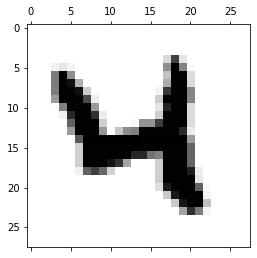

... and with label [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] after to_categorical

X_train shape: (60000, 784)
Y_train shape: (60000, 10)


In [15]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True' #This is needed in my Anaconda+MacOsX installation; leave it commented.
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt
seed=0
np.random.seed(seed) # fix random seed
tf.random.set_seed(seed)
from keras.datasets import mnist

# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)

# reshape data, it could depend on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print()

# cast floats to single precision
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255

# look at an example of data point
print('an example of a data point with label', Y_train[20])
# matshow: display a matrix in a new figure window
plt.matshow(X_train[20,:].reshape(28,28),cmap='binary')
plt.show()

# convert class vectors to binary class matrices, e.g. for use with categorical_crossentropy
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)
print('... and with label', Y_train[20], 'after to_categorical')
print()
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)



In [17]:
# Consider an array of 5 labels out of a set of 3 classes {0, 1, 2}:
labels = np.array([0, 2, 1, 2, 0])
# `to_categorical` converts this into a matrix with as many columns as there are classes.
# The number of rows stays the same.
keras.utils.to_categorical(labels)

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]], dtype=float32)

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

def create_DNN():
    # instantiate model
    model = Sequential()
    # add a dense all-to-all relu layer
    model.add(Dense(400,input_shape=( img_rows*img_cols, ), activation='relu'))
    # add a dense all-to-all relu layer
    model.add(Dense(100, activation='relu'))
    # apply dropout with rate 0.5
    model.add(Dropout(0.5)) #azzera dei neuroni mentre fa il trining, previene overfitting
    # soft-max layer
    model.add(Dense(num_classes, activation='softmax'))
    
    return model

print('Model architecture created successfully!')



Model architecture created successfully!


In [19]:
from tensorflow.keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adamax, Nadam

def compile_model():
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=SDG(),
                  metrics=['accuracy'])
    return model

print('Model compiled successfully and ready to be trained.')

Model compiled successfully and ready to be trained.


### Exercise 12.1

<span style="color:red">Change at will and train your DNN by increasing the number of epochs to an adeuqate value</span>. Try to use at least two other optimizers, different from SGD: <span style="color:red">watch to accuracy and loss for training and validation data and comment on the performances</span>.

# Adam

In [20]:


from tensorflow.keras.datasets import mnist

# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
#Y contiene le etichette corrette

# reshape data, it could depend on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols) #ora sono (60000, 784)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)

# cast floats to single precesion
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1] 
X_train /= 255
X_test /= 255

# convert class vectors to binary class matrices, e.g. for use with categorical_crossentropy
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)

model1 = create_DNN()
model1.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer = Adam(),
                  metrics=['accuracy'])

history = model1.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test), shuffle=True)



2022-06-15 19:40:17.058233: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-06-15 19:40:17.058260: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-06-15 19:40:17.058276: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (pcdipistol): /proc/driver/nvidia/version does not exist
2022-06-15 19:40:17.058694: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-06-15 19:40:17.111976: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceed

Epoch 1/7
1875/1875 [==============================] - ETA: 0s - loss: 0.2816 - accuracy: 0.9175

2022-06-15 19:40:25.536204: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 31360000 exceeds 10% of free system memory.


1875/1875 [==============================] - 9s 5ms/step - loss: 0.2816 - accuracy: 0.9175 - val_loss: 0.1160 - val_accuracy: 0.9632
Epoch 2/7
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1238 - accuracy: 0.9642 - val_loss: 0.0921 - val_accuracy: 0.9708
Epoch 3/7
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0893 - accuracy: 0.9745 - val_loss: 0.0820 - val_accuracy: 0.9746
Epoch 4/7
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0692 - accuracy: 0.9796 - val_loss: 0.0881 - val_accuracy: 0.9759
Epoch 5/7
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0573 - accuracy: 0.9832 - val_loss: 0.0791 - val_accuracy: 0.9781
Epoch 6/7
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0462 - accuracy: 0.9858 - val_loss: 0.0771 - val_accuracy: 0.9805
Epoch 7/7
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0399 - accuracy: 0.9876 - val_loss: 0.0967 - val_accuracy: 0.9785


 43/313 [===>..........................] - ETA: 0s - loss: 0.1468 - accuracy: 0.9709

2022-06-15 19:41:47.255435: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 31360000 exceeds 10% of free system memory.


313/313 [==============================] - 1s 3ms/step - loss: 0.0967 - accuracy: 0.9785

Test loss: 0.09666246175765991
Test accuracy: 0.9785000085830688


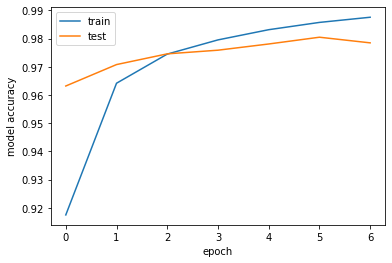

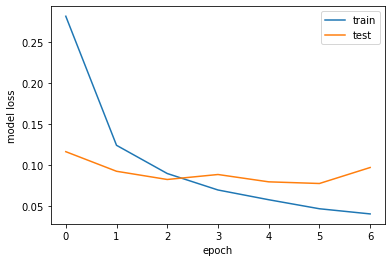

In [22]:


# evaluate model
score = model1.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()



# Adamax

In [23]:


from tensorflow.keras.datasets import mnist

# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
#Y contiene le etichette corrette

# reshape data, it could depend on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols) #ora sono (60000, 784)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)

# cast floats to single precesion
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1] 
X_train /= 255
X_test /= 255

# convert class vectors to binary class matrices, e.g. for use with categorical_crossentropy
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)

model2 = create_DNN()
model2.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer = tf.keras.optimizers.Adamax(),
                  metrics=['accuracy'])

history_2 = model2.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test), shuffle=True)



Epoch 1/7


2022-06-15 19:41:53.081816: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 [==============================] - 9s 5ms/step - loss: 0.4120 - accuracy: 0.8805 - val_loss: 0.1668 - val_accuracy: 0.9511
Epoch 2/7
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1980 - accuracy: 0.9448 - val_loss: 0.1220 - val_accuracy: 0.9632
Epoch 3/7
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1442 - accuracy: 0.9590 - val_loss: 0.0998 - val_accuracy: 0.9697
Epoch 4/7
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1167 - accuracy: 0.9665 - val_loss: 0.0847 - val_accuracy: 0.9742
Epoch 5/7
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0964 - accuracy: 0.9728 - val_loss: 0.0770 - val_accuracy: 0.9765
Epoch 6/7
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0828 - accuracy: 0.9763 - val_loss: 0.0724 - val_accuracy: 0.9779
Epoch 7/7
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0697 - accuracy: 0.9800 - val_loss: 0.0697 - val_accuracy: 0.9789


313/313 [==============================] - 1s 2ms/step - loss: 0.0697 - accuracy: 0.9789

Test loss: 0.0697045773267746
Test accuracy: 0.9789000153541565


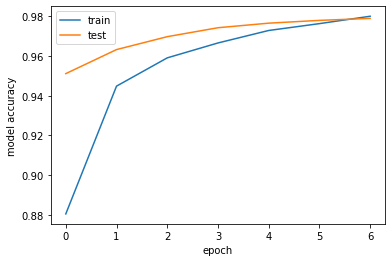

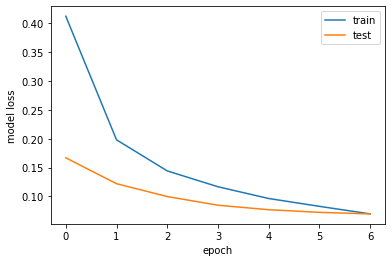

In [24]:


# evaluate model
score = model2.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

# summarize history for accuracy
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

# summarize history for loss
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()



### Exercise 12.2

Change the architecture of your DNN using convolutional layers. Use `Conv2D`, `MaxPooling2D`, `Dropout`, but also do not forget `Flatten`, a standard `Dense` layer and `soft-max` in the end. I have merged step 2 and 3 in the following definition of `create_CNN()` that **<span style="color:red">you should complete</span>**:

In [25]:


# you will need the following for Convolutional Neural Networks
from tensorflow.keras.layers import Flatten, Conv2D, MaxPooling2D , AveragePooling2D , UpSampling2D

# reshape data, depending on Keras backend
if keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')



X_train shape: (60000, 28, 28, 1)
Y_train shape: (60000, 10)

60000 train samples
10000 test samples


In [29]:
def create_CNN():
    # instantiate model
    model = Sequential()
    # add first convolutional layer with 32 filters (dimensionality of output space)
    model.add(Conv2D(32, kernel_size=(3, 3),
                     activation='relu',
                     input_shape=input_shape))
    
    #small autoencoder
    model.add( MaxPooling2D( pool_size=(2,2), padding='same') ) 
    model.add( Conv2D(5, kernel_size=(3, 3), activation='relu') )
    model.add( UpSampling2D( (2,2)) )
    model.add( Dropout(0.5) )
    model.add( Flatten() )
    model.add( Dense(100, activation="sigmoid") )
    model.add( Dense(10 , activation="softmax") )
    
    
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=Adam(),
                  metrics=['accuracy'])
    return model

Epoch 1/7
1875/1875 [==============================] - 42s 22ms/step - loss: 0.2160 - accuracy: 0.9401 - val_loss: 0.0685 - val_accuracy: 0.9802
Epoch 2/7
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0839 - accuracy: 0.9749 - val_loss: 0.0552 - val_accuracy: 0.9838
Epoch 3/7
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0631 - accuracy: 0.9809 - val_loss: 0.0475 - val_accuracy: 0.9852
Epoch 4/7
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0519 - accuracy: 0.9837 - val_loss: 0.0402 - val_accuracy: 0.9876
Epoch 5/7
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0458 - accuracy: 0.9861 - val_loss: 0.0375 - val_accuracy: 0.9877
Epoch 6/7
1875/1875 [==============================] - 35s 18ms/step - loss: 0.0403 - accuracy: 0.9873 - val_loss: 0.0308 - val_accuracy: 0.9901
Epoch 7/7
313/313 [==============================] - 2s 7ms/step - loss: 0.0289 - accuracy: 0.9902

Test loss: 0.02893269620835781

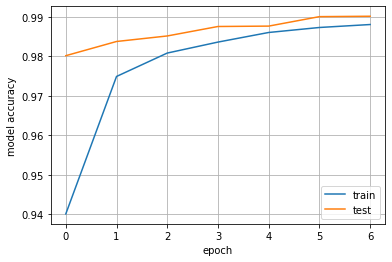

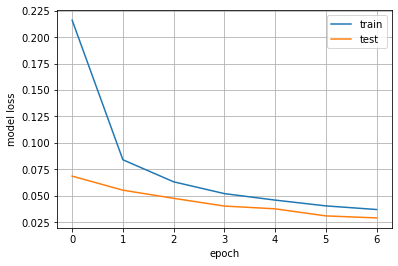

In [30]:


# training parameters
batch_size = 32
epochs = 7

# create the deep conv net
model_CNN=create_CNN()

# train CNN
history = model_CNN.fit(X_train, Y_train,
              batch_size=batch_size,
              epochs=epochs,
              verbose=1,
              validation_data=(X_test, Y_test), shuffle = True)

# evaluate model
score = model_CNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])



# look into training history

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.grid(True)
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.grid(True)
plt.show()

